In [1]:

import sys
from pathlib import Path
import seaborn as sns

In [135]:

LCL_PATH  = str(Path().cwd().parent.parent)
ROOT_PATH = str(Path(LCL_PATH).parent.parent)
print("""
root path:\t{}
local path:\t{}""".format(ROOT_PATH, LCL_PATH))


root path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura
local path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura/laborator_1/TTP


In [3]:

# adding local_folder to the system path
sys.path.append(LCL_PATH)
sys.path.append(ROOT_PATH)
sys.path.append(GENERIC_PATH)
sys.path.append(SPECIFIC_PATH)

from sys_function import * # este in root

In [131]:

sys_remove_modules("imshow")
sys_remove_modules("builds.init_population.ant_colony")
sys_remove_modules("extension.utils.normalization")
sys_remove_modules("builds.dataset_utils.dataset_ttp_man")
sys_remove_modules("builds.dataset_utils.ttp_generator")

from imshow import *
from builds.init_population.ant_colony import *
from extension.utils.normalization import *
from builds.dataset_utils.dataset_ttp_man import *
from builds.dataset_utils.ttp_generator import *

# Data aquisition

In [132]:

ttp_generator = TTPGenerator("{}/data".format(LCL_PATH))
dataset = ttp_generator(nodes_file="NODE_COORD_SECTION.csv",
                        items_file="ITEMS_SECTION.csv")
dataset

{'GENOME_LENGTH': 280,
 'distance': array([[ 0., 20., 24., ..., 43., 34., 18.],
        [20.,  0., 18., ..., 36., 28.,  9.],
        [24., 18.,  0., ..., 20., 11., 10.],
        ...,
        [43., 36., 20., ...,  0.,  9., 29.],
        [34., 28., 11., ...,  9.,  0., 20.],
        [18.,  9., 10., ..., 29., 20.,  0.]], shape=(280, 280)),
 'coords': array([[288, 149],
        [288, 129],
        [270, 133],
        [256, 141],
        [256, 157],
        [246, 157],
        [236, 169],
        [228, 169],
        [228, 161],
        [220, 169],
        [212, 169],
        [204, 169],
        [196, 169],
        [188, 169],
        [196, 161],
        [188, 145],
        [172, 145],
        [164, 145],
        [156, 145],
        [148, 145],
        [140, 145],
        [148, 169],
        [164, 169],
        [172, 169],
        [156, 169],
        [140, 169],
        [132, 169],
        [124, 169],
        [116, 161],
        [104, 153],
        [104, 161],
        [104, 169],
        [ 90

In [6]:
dataset["distance"][169:172]

array([[249., 240., 226., 218., 226., 218., 218., 212., 207., 206., 201.,
        195., 190., 185., 184., 167., 156., 151., 146., 142., 138., 163.,
        171., 175., 167., 159., 156., 153., 143., 132., 140., 148., 141.,
        132., 132., 140., 145., 137., 129., 121., 113., 105.,  97., 101.,
        109., 116., 124., 132., 140., 148., 149., 142., 134., 126., 119.,
        111., 104.,  97.,  94.,  89.,  82.,  78.,  81.,  82.,  75.,  80.,
         91., 101., 106.,  96.,  91.,  85.,  80.,  75.,  72.,  64.,  68.,
         66.,  52.,  43.,  47.,  51.,  57.,  62.,  69.,  66.,  58.,  50.,
         41.,  33.,  30.,  28.,  40.,  48.,  56.,  57.,  49.,  41.,  31.,
         23.,  18.,  16.,  18.,  23.,  18.,  16.,  24.,  29.,  35.,  36.,
         43.,  45.,  54.,  51.,  58.,  63.,  66.,  74.,  79.,  86.,  94.,
        101., 109., 116., 124., 128., 131., 134., 127., 131., 135., 140.,
        145., 141., 136., 131., 126., 121., 117., 124., 120., 117., 114.,
        112., 104., 106., 109., 113., 

In [7]:
dataset_obj = DatasetTTPMan(dataset)

# Ant Colony Optimization

In [117]:

ant_colony_obj = AntColonyOptimization(dataset_man=dataset_obj, alpha=1.0, beta=11.0,
                 rho=0.5, q=1.0)

In [73]:

new_route = np.arange(ant_colony_obj.GENOME_LENGTH, dtype=np.int32)
old_route = new_route

In [96]:
old_route = new_route
#tmp_routes = []
best_route = None
best_cost  = np.inf

In [111]:

for i in range(500):
    print("Start noul inceput {} ___________".format(i))
    new_route = ant_colony_obj(tmp_routes, start_city=0, generations=200, size_ants=35, monitor_size=25)
    tmp_routes.append(new_route)
    cost  = dataset_obj.computeIndividDistance(new_route)
    if (cost < best_cost):
        best_cost  = cost
        best_route = new_route
    print("Stop noul inceput {} ============".format(i))

Start noul inceput 0 ___________
Start city: 97, prob: 0.0035714285913854837, freq: 1.0
generatia: 0, best cost: 3502.0
generatia: 1, best cost: 3427.0
generatia: 2, best cost: 3533.0
generatia: 3, best cost: 3513.0
generatia: 4, best cost: 3574.0
generatia: 5, best cost: 3451.0
generatia: 6, best cost: 3478.0
generatia: 7, best cost: 3448.0
generatia: 8, best cost: 3377.0
generatia: 9, best cost: 3354.0
generatia: 10, best cost: 3404.0
generatia: 11, best cost: 3363.0
generatia: 12, best cost: 3223.0
generatia: 13, best cost: 3286.0
generatia: 14, best cost: 3176.0
generatia: 15, best cost: 3207.0
generatia: 16, best cost: 3261.0
generatia: 17, best cost: 3188.0
generatia: 18, best cost: 3180.0
generatia: 19, best cost: 3129.0
generatia: 20, best cost: 3149.0
generatia: 21, best cost: 3103.0
generatia: 22, best cost: 3212.0
generatia: 23, best cost: 3121.0
generatia: 24, best cost: 3002.0
generatia: 25, best cost: 3086.0
generatia: 26, best cost: 2966.0
generatia: 27, best cost: 3200.

In [136]:

filename_population = "{}/ant_routes.npy".format(LCL_PATH)
with open(filename_population, 'wb') as f:
    np.save(f, np.array(tmp_routes))

In [118]:
ant_colony_obj.updateByElite(tmp_routes)

In [122]:

tau_image = (normalization(ant_colony_obj.tau) * 255).astype(np.uint8)
image_show_wait(tau_image, window_name="Tau")

Key 32


In [130]:
np.argwhere(tau_image > 0)

array([[  0,   1],
       [  0, 241],
       [  0, 242],
       ...,
       [279,   0],
       [279,   1],
       [279,   2]], shape=(1322, 2))

In [134]:

map_all = ttp_generator.putRoutesOnMap(np.argwhere(tau_image > 0))
image_show_wait(map_all, window_name="All")

Key 32


In [112]:
len(tmp_routes)

1074

In [43]:

old_distance = dataset_obj.computeIndividDistance(old_route)
new_distance = dataset_obj.computeIndividDistance(best_route)
print("old distance: {}, new distance: {}".format(old_distance, new_distance))
map_imgo = ttp_generator.putRouteOnMap(old_route)
map_imgp = ttp_generator.putRouteOnMap(best_route)
image_show(map_imgo, window_name="Old")
image_show_wait(map_imgp, window_name="AntColony")

old distance: 2808.0, new distance: 2690.0
Key 32


In [ ]:
np.argwhere(ant_colony_obj.tau >= 1e-5)

In [ ]:
ant_colony_obj.tau[ant_colony_obj.tau >= 1e-5].shape

<Axes: >

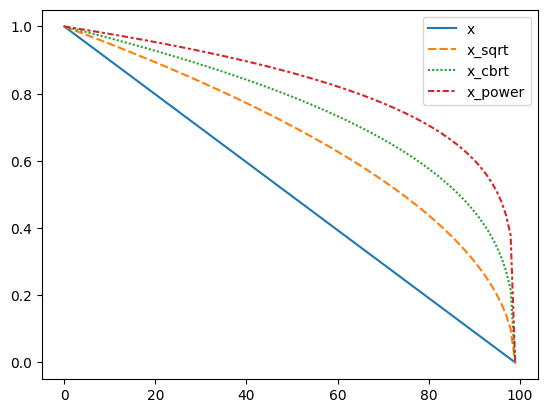

In [57]:

x = np.linspace(start=1, stop=0., num=100)
#data = {"x":x, "x_sqrt":np.sqrt(x), "x_log":np.log(x), "x_exp":np.exp(x)}
data = {"x":x, "x_sqrt":np.sqrt(x), "x_cbrt":np.cbrt(x), "x_power":np.power(x, 1/np.cbrt(len(tmp_routes)))}
sns.lineplot(data)